<div style="display: flex; justify-content: center; align-items: center;">
<p align="center">
<img src="imagem.jpg" style="width:512px;height:438px">
</p>

<div style="margin-left: 20px;">
<h1 style="font-family: times new roman;">Torre de PROGRAMAção negra</h1>
<p style="margin-bottom: 1px;font-family: times new roman"> "Na Torre de PROGRAMAção Negra, onde dragões entrelaçam suas asas aos desígnios </p>
<p style="margin-bottom: 1px;font-family: times new roman"> dos deuses, os registros akáshicos se tecem em código dourado. Sob um céu estrelado, </p>
<p style="margin-bottom: 1px;font-family: times new roman">constelações de algoritmos se revelam, guiando mentes ousadas através do cosmos digital. </p>
<p style="margin-bottom: 1px;font-family: times new roman">Aqui, a magia negra da programação desvela os segredos ancestrais do conhecimento,</p>
<p style="margin-bottom: 1px;font-family: times new roman">unindo o místico e o tecnológico em uma dança celestial de sabedoria."</p>
<p style="margin-bottom: 5px;">ID Missão: Boss final </p>
<p style="margin-bottom: 5px;">INTEGRANTES: Eric Leandro Lima Mendonça (23014), Júlia Amancio Ferreira (23006) Vinícius André Oliveira Lima Moura (23011) e João Otávio de Ávila Nascimento (23022) </p>
<p style="margin-bottom: 5px;">DISCIPLINA: Aprendizado de Máquina</p>
<p style="margin-bottom: 5px;">PROFESSOR: Daniel Cassar</p>



</div>

# ***Dataset***

## **Sobre o dataset**


O dataset se refere a um banco de dados de exoplanetas catalogados pela nasa, tendo como colunas:

1. **Name**: O nome do exoplaneta ou uma designação única atribuída a ele para fins de identificação.

2. **Distance**: A distância estimada entre o sistema estelar que abriga o exoplaneta e a Terra. Isso pode ser expresso em unidades astronômicas (UA) ou outras unidades de medida.

3. **Stellar Magnitude**: A magnitude aparente da estrela hospedeira vista da Terra. A magnitude estelar é uma medida da luminosidade de uma estrela.

4. **Planet Type**: O tipo do exoplaneta, que pode incluir categorias como "Terrestre", "Gasoso" ou outros, dependendo das características do planeta.

5. **Discovery Year**: O ano em que o exoplaneta foi inicialmente descoberto ou identificado.

6. **Mass Multiplier**: Um multiplicador que indica a massa do exoplaneta em relação a uma unidade de medida de massa de referência (como a massa da Terra).

7. **Mass WRT**: A referência em relação à qual a massa do exoplaneta está sendo expressa (por exemplo, em relação à Terra).

8. **Radius Multiplier**: Um multiplicador que indica o raio do exoplaneta em relação a uma unidade de medida de raio de referência (como o raio da Terra).

9. **Radius WRT**: A referência em relação à qual o raio do exoplaneta está sendo expresso (por exemplo, em relação à Terra).

10. **Orbital Radius**: O raio orbital do exoplaneta, que é a distância média entre o exoplaneta e sua estrela hospedeira, frequentemente expresso em unidades astronômicas (UA).

11. **Orbital Period**: O período orbital do exoplaneta, que é o tempo que ele leva para completar uma órbita ao redor de sua estrela hospedeira, geralmente em dias terrestres.

12. **Eccentricity**: A excentricidade da órbita do exoplaneta, que descreve o quão elíptica (não circular) é a órbita. Varia de 0 (órbita circular) a 1 (órbita altamente elíptica).

13. **Detection Method**: O método pelo qual o exoplaneta foi detectado ou descoberto. Isso pode incluir métodos como "Trânsito" (observação de diminuições periódicas na luz da estrela quando o exoplaneta passa na frente dela) ou "Velocidade Radial" (medição das variações na velocidade radial da estrela causadas pela órbita do exoplaneta).



# ***Código***

In [68]:
'''IMPORTS'''
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns 
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import calinski_harabasz_score

In [69]:
'''FUNÇÕES'''

def gera_palpite_raio_vizinhanca(X, N):
    """Método para palpite do raio de vizinhança

    Args:
      X: conjunto de dados (atributos).
      N: número minimo de vizinhos do DBSCAN.

    Returns:
      Valor sugerido do raio da vizinhança.

    References:
      Código modificado de https://stackoverflow.com/a/71468901.
    """

    modelo = NearestNeighbors(n_neighbors=N + 1, metric='manhattan')
    modelo.fit(X)

    distancias, _ = modelo.kneighbors(X)
    distancias = np.sort(distancias, axis=0)
    distancias = distancias[:, N]

    cotovelo = KneeLocator(
        np.arange(len(distancias)),
        distancias,
        curve="convex",
        direction="increasing",
        interp_method="polynomial",
    )

    cotovelo.plot_knee()
    plt.xlabel("Quantidade de pontos")
    plt.ylabel("Distância")

    palpite_raio = distancias[cotovelo.knee]

    print(f"O palpite para o raio da vizinhança é {palpite_raio}")

    return palpite_raio

In [70]:
'''Importando o dataset'''

exoplanetas = pd.read_csv("Exoplanets.csv", sep=',')
df = pd.DataFrame(exoplanetas)

df

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.70900,Jupiter,1.373,Jupiter,0.044210,0.007940,0.04,Transit
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,6.30000,Jupiter,1.140,Jupiter,115.000000,1176.500000,0.00,Direct Imaging
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.70000,Earth,0.913,Earth,0.016340,0.005476,0.06,Radial Velocity
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,1.14000,Earth,1.050,Earth,0.021560,0.008487,0.00,Radial Velocity


## **Tratamento dos dados**

In [71]:
'''Convertendo massa e raio'''

### MASSA ###

mass = []

for i in range(0, len(df['mass_wrt'])):
    
    if df['mass_wrt'][i] == 'Jupiter': 
        mass.append( 317.8 * df['mass_multiplier'][i])
    else:
        mass.append( df['mass_multiplier'][i])
        
df['mass'] = mass

df = df.drop(['mass_wrt', 'mass_multiplier'], axis=1)

### RAIO ###

radius = []

for i in range(0, len(df['radius_wrt'])):
    
    if df['radius_wrt'][i] == 'Jupiter': 
        radius.append( 11.2 * df['radius_multiplier'][i])
    else:
        radius.append( df['radius_multiplier'][i])
        
df['radius'] = radius

df = df.drop(['radius_wrt', 'radius_multiplier'], axis=1)


df # Mostrando nova tabela

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,detection_method,mass,radius
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,Radial Velocity,6165.320000,12.0960
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,Radial Velocity,4684.372000,12.2080
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,Radial Velocity,1525.440000,12.8800
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,Radial Velocity,2586.513818,12.5440
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,Radial Velocity,565.684000,13.4400
...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.044210,0.007940,0.04,Transit,225.320200,15.3776
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,115.000000,1176.500000,0.00,Direct Imaging,2002.140000,12.7680
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.016340,0.005476,0.06,Radial Velocity,0.700000,0.9130
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,0.021560,0.008487,0.00,Radial Velocity,1.140000,1.0500


In [72]:
'''Convertendo os dados simbolicos númeriocos'''

# Criando uma instância para a feature categórica
encoder_detection_method = OneHotEncoder()

# Aplicando a transformação e transformado em colunas de 0 e 1 em formato de DataFrame
deteccao_encoded = encoder_detection_method.fit_transform(df[['detection_method']])
deteccao_novo = pd.DataFrame(deteccao_encoded.toarray(), columns=encoder_detection_method.get_feature_names_out(['detection_method']))

# Removendo a coluna categórica no dataframe antigo
df_dropado = df.drop(['detection_method'], axis=1)

# Juntando o dataframe antigo (dropado) com o novo dataframe de colunas numéricas
df_tratado = pd.concat([df_dropado, deteccao_novo], axis=1)

df_tratado # Mostrando nova tabela

,name,distance,stellar_magnitude,planet_type,discovery_year,orbital_radius,orbital_period,eccentricity,mass,radius,...,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,1.290000,0.892539,0.23,6165.320000,12.0960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,1.530000,1.400000,0.08,4684.372000,12.2080,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,0.830000,0.508693,0.00,1525.440000,12.8800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,2.773069,4.800000,0.37,2586.513818,12.5440,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.660000,2.200000,0.68,565.684000,13.4400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5245,XO-7 b,764.0,10.52100,Gas Giant,2019,0.044210,0.007940,0.04,225.320200,15.3776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5246,YSES 2 b,357.0,10.88500,Gas Giant,2021,115.000000,1176.500000,0.00,2002.140000,12.7680,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5247,YZ Ceti b,12.0,12.07400,Terrestrial,2017,0.016340,0.005476,0.06,0.700000,0.9130,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5248,YZ Ceti c,12.0,12.07400,Super Earth,2017,0.021560,0.008487,0.00,1.140000,1.0500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [73]:
'''Ajustes finais'''

# Retirando colunas desinteressantes
df_tratado = df_tratado.drop(['name', 'distance', 'discovery_year'], axis=1)

# Retirando valores nan
df_tratado = df_tratado.dropna()

# Ajustando o index
df_tratado = df_tratado.reset_index(drop=True)

df_tratado # Mostrando nova tabela


,stellar_magnitude,planet_type,orbital_radius,orbital_period,eccentricity,mass,radius,detection_method_Astrometry,detection_method_Direct Imaging,detection_method_Disk Kinematics,detection_method_Eclipse Timing Variations,detection_method_Gravitational Microlensing,detection_method_Orbital Brightness Modulation,detection_method_Pulsar Timing,detection_method_Pulsation Timing Variations,detection_method_Radial Velocity,detection_method_Transit,detection_method_Transit Timing Variations
0,4.72307,Gas Giant,1.290000,0.892539,0.23,6165.320000,12.0960,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.01300,Gas Giant,1.530000,1.400000,0.08,4684.372000,12.2080,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,5.23133,Gas Giant,0.830000,0.508693,0.00,1525.440000,12.8800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6.61935,Gas Giant,2.773069,4.800000,0.37,2586.513818,12.5440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,6.21500,Gas Giant,1.660000,2.200000,0.68,565.684000,13.4400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,10.52100,Gas Giant,0.044210,0.007940,0.04,225.320200,15.3776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4773,10.88500,Gas Giant,115.000000,1176.500000,0.00,2002.140000,12.7680,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4774,12.07400,Terrestrial,0.016340,0.005476,0.06,0.700000,0.9130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4775,12.07400,Super Earth,0.021560,0.008487,0.00,1.140000,1.0500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Agrupamento não supervisionado**

O nosso objetivo aqui seria fazer com que nosso modelo conseguisse dividir de dorma eficiente nossos plaentas em seus tipo, contudo isso não é possivel, já que nos faltam os dados da atmosfera de cada planeta para fazer essa divisão, pois composição atmosférica desempenha um papel fundamental na diferenciação entre os tipos de planetas, sendo um fator determinante que influencia significativamente suas características, assim nosso modelos não conseguiriam dividir de forma eficiente.

In [74]:
tipos_planetas = df_tratado['planet_type'].unique()

tipos_planetas

array(['Gas Giant', 'Super Earth', 'Neptune-like', 'Terrestrial'],
      dtype=object)

Mas ainda podemos aproveitar o uso para provar a importancia dos dados atmosfericos, com isso vamos tentar agrupar somente com os outros dados relevantes para essa classificação, massa, raio e raio da orbita.

In [75]:
'''Criando um conjunto de dados somente com os dados de interesse'''

FEATURES = [ 'mass', 'radius', 'orbital_radius']

X = df_tratado[FEATURES]

X # Mostrando novo conjunto de dados


,mass,radius,orbital_radius
0,6165.320000,12.0960,1.290000
1,4684.372000,12.2080,1.530000
2,1525.440000,12.8800,0.830000
3,2586.513818,12.5440,2.773069
4,565.684000,13.4400,1.660000
...,...,...,...
4772,225.320200,15.3776,0.044210
4773,2002.140000,12.7680,115.000000
4774,0.700000,0.9130,0.016340
4775,1.140000,1.0500,0.021560


Caso fosse possivel obter um agrupamento correto, teriamos os grupos como os descritos abaixo:

In [76]:

contagem_repeticoes = df_tratado['planet_type'].value_counts()

# Exibindo o resultado
print(contagem_repeticoes)


Neptune-like    1673
Super Earth     1484
Gas Giant       1437
Terrestrial      183
Name: planet_type, dtype: int64


Usaremos três modelos diferentes para o agrupamento, o K

### Kmeans

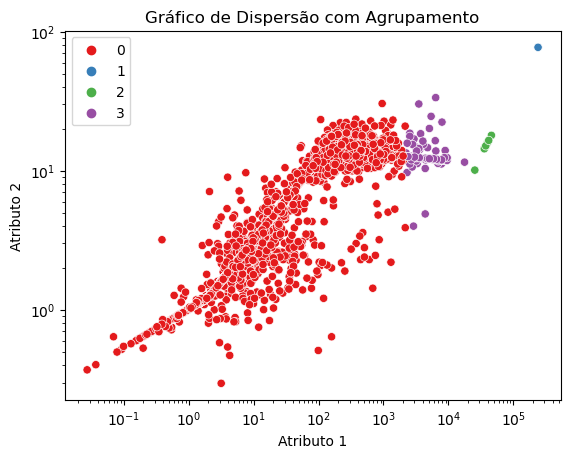

In [77]:

SEMENTE_ALEATORIA = 67
NUM_GRUPOS = 4

agrupador = KMeans(
    n_clusters=NUM_GRUPOS, random_state=SEMENTE_ALEATORIA, n_init="auto"
)

agrupador.fit(X)

rotulos = agrupador.labels_


sns.scatterplot(x=X['mass'], y=X['radius'], hue=rotulos, palette="Set1")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.xscale('log')
plt.yscale('log')
plt.title("Gráfico de Dispersão com Agrupamento")
plt.show()


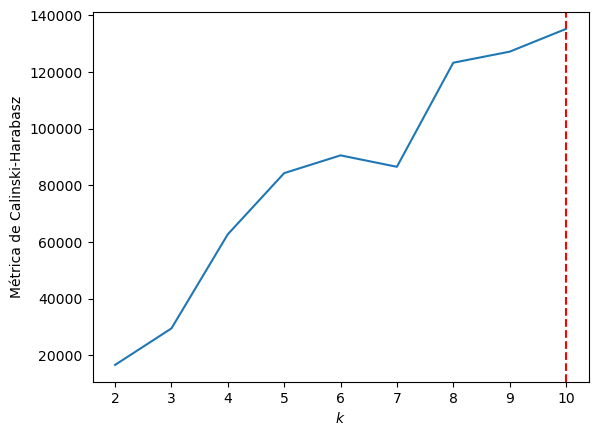

In [78]:


VALORES_DE_K = range(2, 11)
metricas = []

for k in VALORES_DE_K:
    agrupador = KMeans(
        n_clusters=k, random_state=SEMENTE_ALEATORIA, n_init="auto"
    )
    agrupador.fit(X)
    rotulos = agrupador.labels_
    metrica = calinski_harabasz_score(X, rotulos)
    metricas.append(metrica)

indice_max = metricas.index(max(metricas))

sns.lineplot(x=VALORES_DE_K, y=metricas)
plt.axvline(VALORES_DE_K[indice_max], linestyle="--", color="red")
plt.xlabel("$k$")
plt.ylabel("Métrica de Calinski-Harabasz");

### DBS Scan

O palpite para o raio da vizinhança é 14.449715999999993


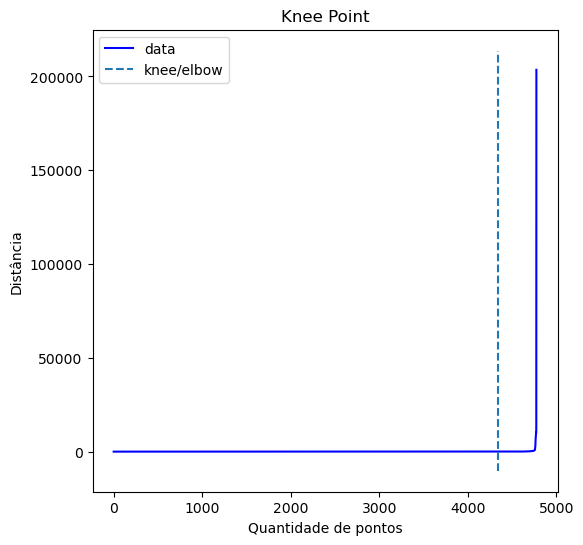

In [79]:
num_atributos = X.shape[-1]

palpite_num_min_vizinhos = 2 * num_atributos

palpite_raio_vizinhanca = gera_palpite_raio_vizinhanca(
    X, palpite_num_min_vizinhos
)

Número de grupos identificados: 2
Número de exemplos anômalos (outliers) indentificados: 828


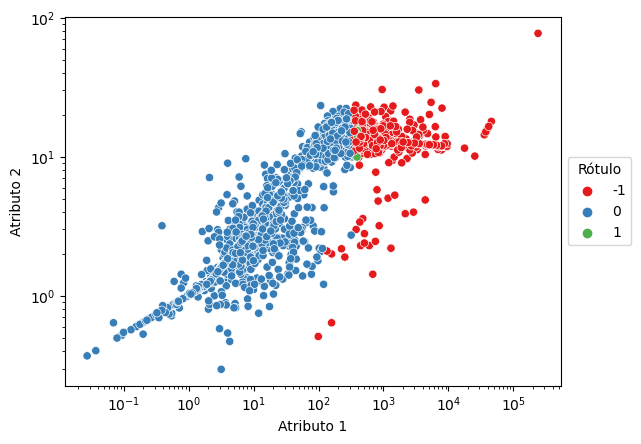

In [80]:

RAIO_VIZINHANCA = 8.163399999999983
NUM_MIN_VIZINHOS = 20

agrupador = DBSCAN(eps=RAIO_VIZINHANCA, min_samples=NUM_MIN_VIZINHOS)

agrupador.fit(X)

rotulos = agrupador.labels_

n_outliers = list(rotulos).count(-1)
n_grupos = len(set(rotulos))

if n_outliers > 0:
    n_grupos = n_grupos - 1

print(f"Número de grupos identificados: {n_grupos}")
print(f"Número de exemplos anômalos (outliers) indentificados: {n_outliers}")

sns.scatterplot(x=X['mass'], y=X['radius'], hue=rotulos, palette="Set1")
plt.xlabel("Atributo 1")
plt.ylabel("Atributo 2")
plt.xscale('log')
plt.yscale('log')
plt.legend(title="Rótulo", loc="center left", bbox_to_anchor=(1, 0.5));

### Hierarquico

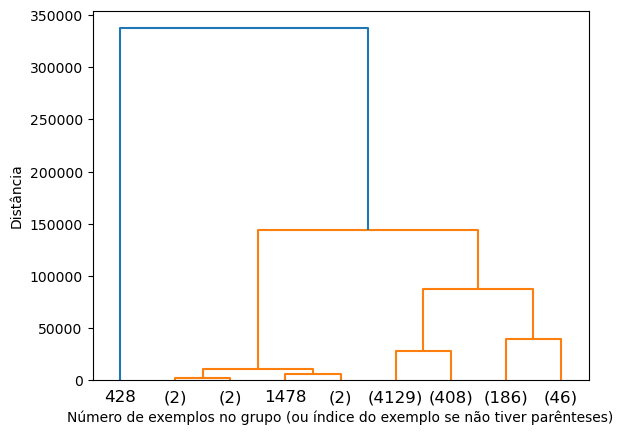

In [81]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# X são seus dados

#METODO_DISTANCIA = "single"  # distância de ligação mínima
#METODO_DISTANCIA = "complete"  # distância de ligação máxima
#METODO_DISTANCIA = "average"   # distância de ligação média
METODO_DISTANCIA = "ward"      # distância de variância mínima

linked = linkage(X, METODO_DISTANCIA)  # 'ward' é um método comum de linkage
#dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)

NIVEL_MAXIMO = 3

#dendrogram(matriz_conexoes, truncate_mode="level", p=NIVEL_MAXIMO)
dendrogram(linked, truncate_mode="level", p=NIVEL_MAXIMO)

plt.xlabel("Número de exemplos no grupo (ou índice do exemplo se não tiver parênteses)")
plt.ylabel("Distância");
plt.show()

## **Floresta aleatória**




In [82]:

SEMENTE_ALEATORIA = 1000
TAMANHO_TESTE = 0.15
FEATURES = df_tratado.drop(['planet_type'], axis=1)
TARGET = df_tratado['planet_type']

df_treino, df_teste = train_test_split(
    df_tratado, test_size=TAMANHO_TESTE, random_state=SEMENTE_ALEATORIA)

X_treino = df_treino.drop('planet_type', axis=1)
y_treino = df_treino['planet_type']

X_teste = df_teste.drop('planet_type', axis=1)
y_teste = df_teste['planet_type']

In [83]:

modelo_rf = RandomForestClassifier(random_state=SEMENTE_ALEATORIA)

#treino geralllllllllll
modelo_rf.fit(X_treino, y_treino)

y_previsao = modelo_rf.predict(X_teste)

acuracia = accuracy_score(y_teste, y_previsao)

print(f"A acurácia do modelo árvore de decisão foi de", acuracia)

#fazendo teste com a primeira linha (dado que já existe)
exemplo = [4.72307, 1.290000, 0.892539, 0.23, 6165.320000, 12.0960, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
df_exem = pd.DataFrame([exemplo])
previsao_exemplo = modelo_rf.predict(df_exem)

print("A previsão para o exemplo é:", previsao_exemplo)

A acurácia do modelo árvore de decisão foi de 0.9707112970711297
A previsão para o exemplo é: ['Gas Giant']


C:\Users\eric23014\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
